# Data Cleaning and Exploration

This notebook imports the condensed .csv file created in the Data Condensing notebook. Exploration of the data is then done using statistical metrics and visualizations. Missing and errenous values are also dealt with before writing this cleaned dataframe to another .csv file ready for use in model training

## Section 1 - Data Importing

Import libraries we will be using

In [250]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Import the data which has been condensed and undergone some preprocessing in the notebook 'Data Condensing'

In [251]:
df = pd.read_csv('./data/Condensed Data/condensedData.csv')

Lets take a peek at the dataframe

In [252]:
df.head()

Timestamp  Air Temp  CO2 Conc. ICOS  CO2 Conc. 33m      PAR  \
0  2003-01-01 00:00:00 -23.21850             NaN        381.525  0.11767   
1  2003-01-01 01:00:00 -23.33533             NaN        381.407  0.11767   
2  2003-01-01 02:00:00 -23.45733             NaN        381.371  0.04983   
3  2003-01-01 03:00:00 -23.63433             NaN        381.285  0.05017   
4  2003-01-01 04:00:00 -23.62583             NaN        381.292  0.14525   

   NOx Conc. 16m  NOx Conc. 33m  Precipitation  Rel. Humidity 16m  \
0          1.213          1.275            NaN           99.41383   
1          1.215          1.176            NaN           99.40667   
2          1.321          1.222            NaN          100.56050   
3          1.115          1.042            NaN          100.19917   
4          1.040          0.967            NaN           98.42567   

   Rel. Humidity 33m  Soil Water  GPP  
0            101.131       0.122  0.0  
1            102.394         NaN  0.0  
2            103.234         NaN  0.0  
3            102.834         NaN  0.0  
4            101.123         NaN  0.0

When importing the data, the Timestamp has been read as an 'Object' type. We need to convert this back to a datetime64 object.

In [253]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

We'll then set this Timestamp as the index of the dataframe to full convert the dataframe into a timeseries

In [254]:
df.set_index('Timestamp', inplace=True)

## Section 2 - Describe the data

The describe method on the dataframe gives some useful statistical metrics for the spread on feature

In [255]:
df.describe()

Air Temp  CO2 Conc. ICOS  CO2 Conc. 33m            PAR  \
count  172368.000000    84483.000000  123568.000000  173987.000000   
mean        4.614341      411.284735     392.004494     201.173224   
std         9.476926       11.648678      13.568534     342.810640   
min       -27.460500      323.062850     348.910000     -38.255000   
25%        -1.637007      403.866685     381.542750      -0.037275   
50%         4.213170      411.442280     392.351500      10.765170   
75%        12.004670      418.874400     402.706000     256.235085   
max        31.549670      884.888200     452.839000    1731.775300   

       NOx Conc. 16m  NOx Conc. 33m  Precipitation  Rel. Humidity 16m  \
count  166055.000000  166724.000000  150574.000000      145020.000000   
mean        1.206174       1.193242       0.001373          80.351979   
std         1.519579       1.502228       0.006869          19.754916   
min        -0.200000      -0.135000       0.000000          13.920500   
25%         0.334000       0.330000       0.000000          67.719875   
50%         0.743000       0.734220       0.000000          88.603260   
75%         1.513000       1.499000       0.000000          96.273777   
max        29.966000      31.786000       0.364830         103.977500   

       Rel. Humidity 33m     Soil Water            GPP  
count      123523.000000  109435.000000  175320.000000  
mean           80.225937       0.247691       3.106778  
std            20.254229       0.074927       5.341416  
min            16.088330       0.054500      -7.637000  
25%            66.849000       0.193500       0.000000  
50%            86.999000       0.255000       0.312000  
75%            95.931000       0.301000       4.042500  
max           118.773000       0.545000      31.151000

The info method gives information about the datatype of each feature and the number of non-null entries

In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 175320 entries, 2003-01-01 00:00:00 to 2022-12-31 23:00:00
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Air Temp           172368 non-null  float64
 1   CO2 Conc. ICOS     84483 non-null   float64
 2   CO2 Conc. 33m      123568 non-null  float64
 3   PAR                173987 non-null  float64
 4   NOx Conc. 16m      166055 non-null  float64
 5   NOx Conc. 33m      166724 non-null  float64
 6   Precipitation      150574 non-null  float64
 7   Rel. Humidity 16m  145020 non-null  float64
 8   Rel. Humidity 33m  123523 non-null  float64
 9   Soil Water         109435 non-null  float64
 10  GPP                175320 non-null  float64
dtypes: float64(11)
memory usage: 16.1 MB


Count the number of NA values per feature

In [257]:
df.isna().sum()

Air Temp              2952
CO2 Conc. ICOS       90837
CO2 Conc. 33m        51752
PAR                   1333
NOx Conc. 16m         9265
NOx Conc. 33m         8596
Precipitation        24746
Rel. Humidity 16m    30300
Rel. Humidity 33m    51797
Soil Water           65885
GPP                      0
dtype: int64

Calculate the percentage of NA values per feature

In [258]:
counts = df.isna().sum() 
(counts/len(df))*100

Air Temp              1.683778
CO2 Conc. ICOS       51.812115
CO2 Conc. 33m        29.518595
PAR                   0.760324
NOx Conc. 16m         5.284622
NOx Conc. 33m         4.903034
Precipitation        14.114762
Rel. Humidity 16m    17.282683
Rel. Humidity 33m    29.544262
Soil Water           37.579854
GPP                   0.000000
dtype: float64

## Section 3 - Data Visualisation

Calculate the pearson correlation of each feature vs feature pairing, and plotting the resulting correaltion matrix as a heatmap. Setting annot to True means we also see the numerical value for the correlation on the plot itself

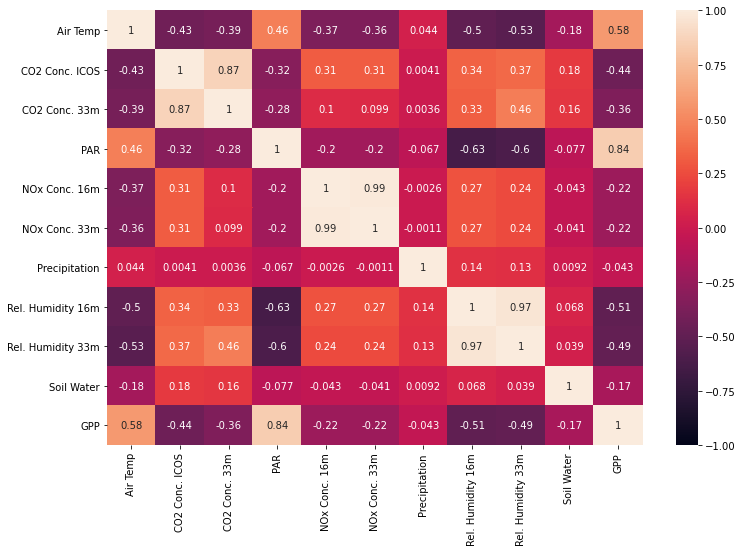

In [259]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1)
plt.show()

Calculate the same correlation matrix, but only using the year 2013 of the dataset

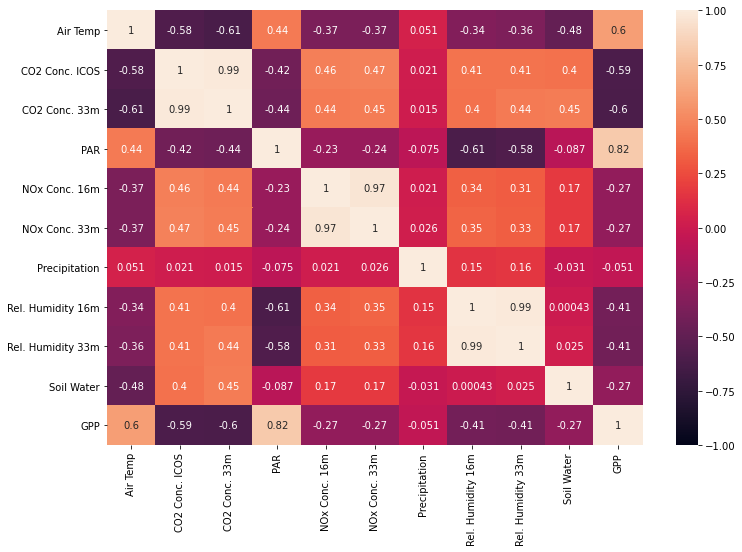

In [260]:
plt.figure(figsize=(12,8))
sns.heatmap(df.loc[(df.index < '01-01-2014') & (df.index > '01-01-2013')].corr(), annot=True, vmin=-1, vmax=1)
plt.show()

Calculate the difference between the 1 year correlation heatmap and the full dataset correlation heatmap. This gives us an idea if the dataset as a whole is representative of individual years. We can see most values are close to 0, meaning the correlation of the first year is nearly identical to the correlation of the full dataset

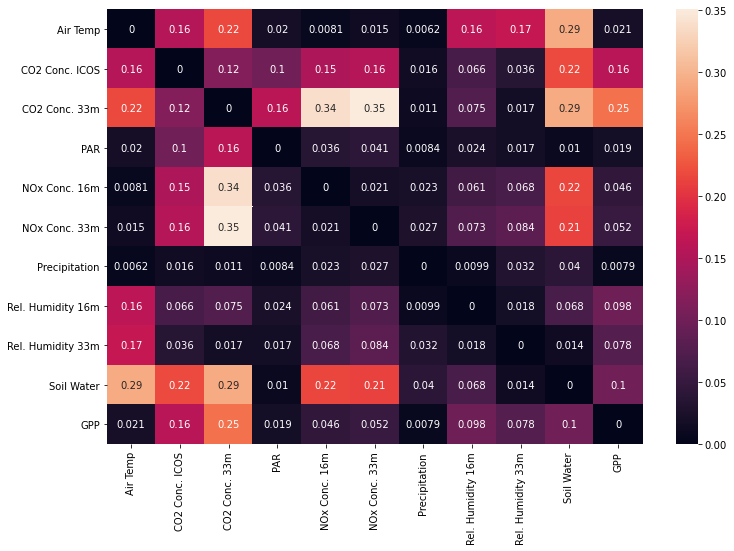

In [261]:
plt.figure(figsize=(12,8))
corrfull = df.corr()
corr1y = df.loc[(df.index < '01-01-2014') & (df.index > '01-01-2013')].corr()
diff = abs(corrfull - corr1y)
sns.heatmap(diff, annot=True)
plt.show()

Seabornes pairplot plots a scatter plot for each feature vs feature pairing, giving us a brief idea of the relationships between features. On the diagonal where the feature is plotted against itself, a histogram is plotted instead to show the distribution of that feature 

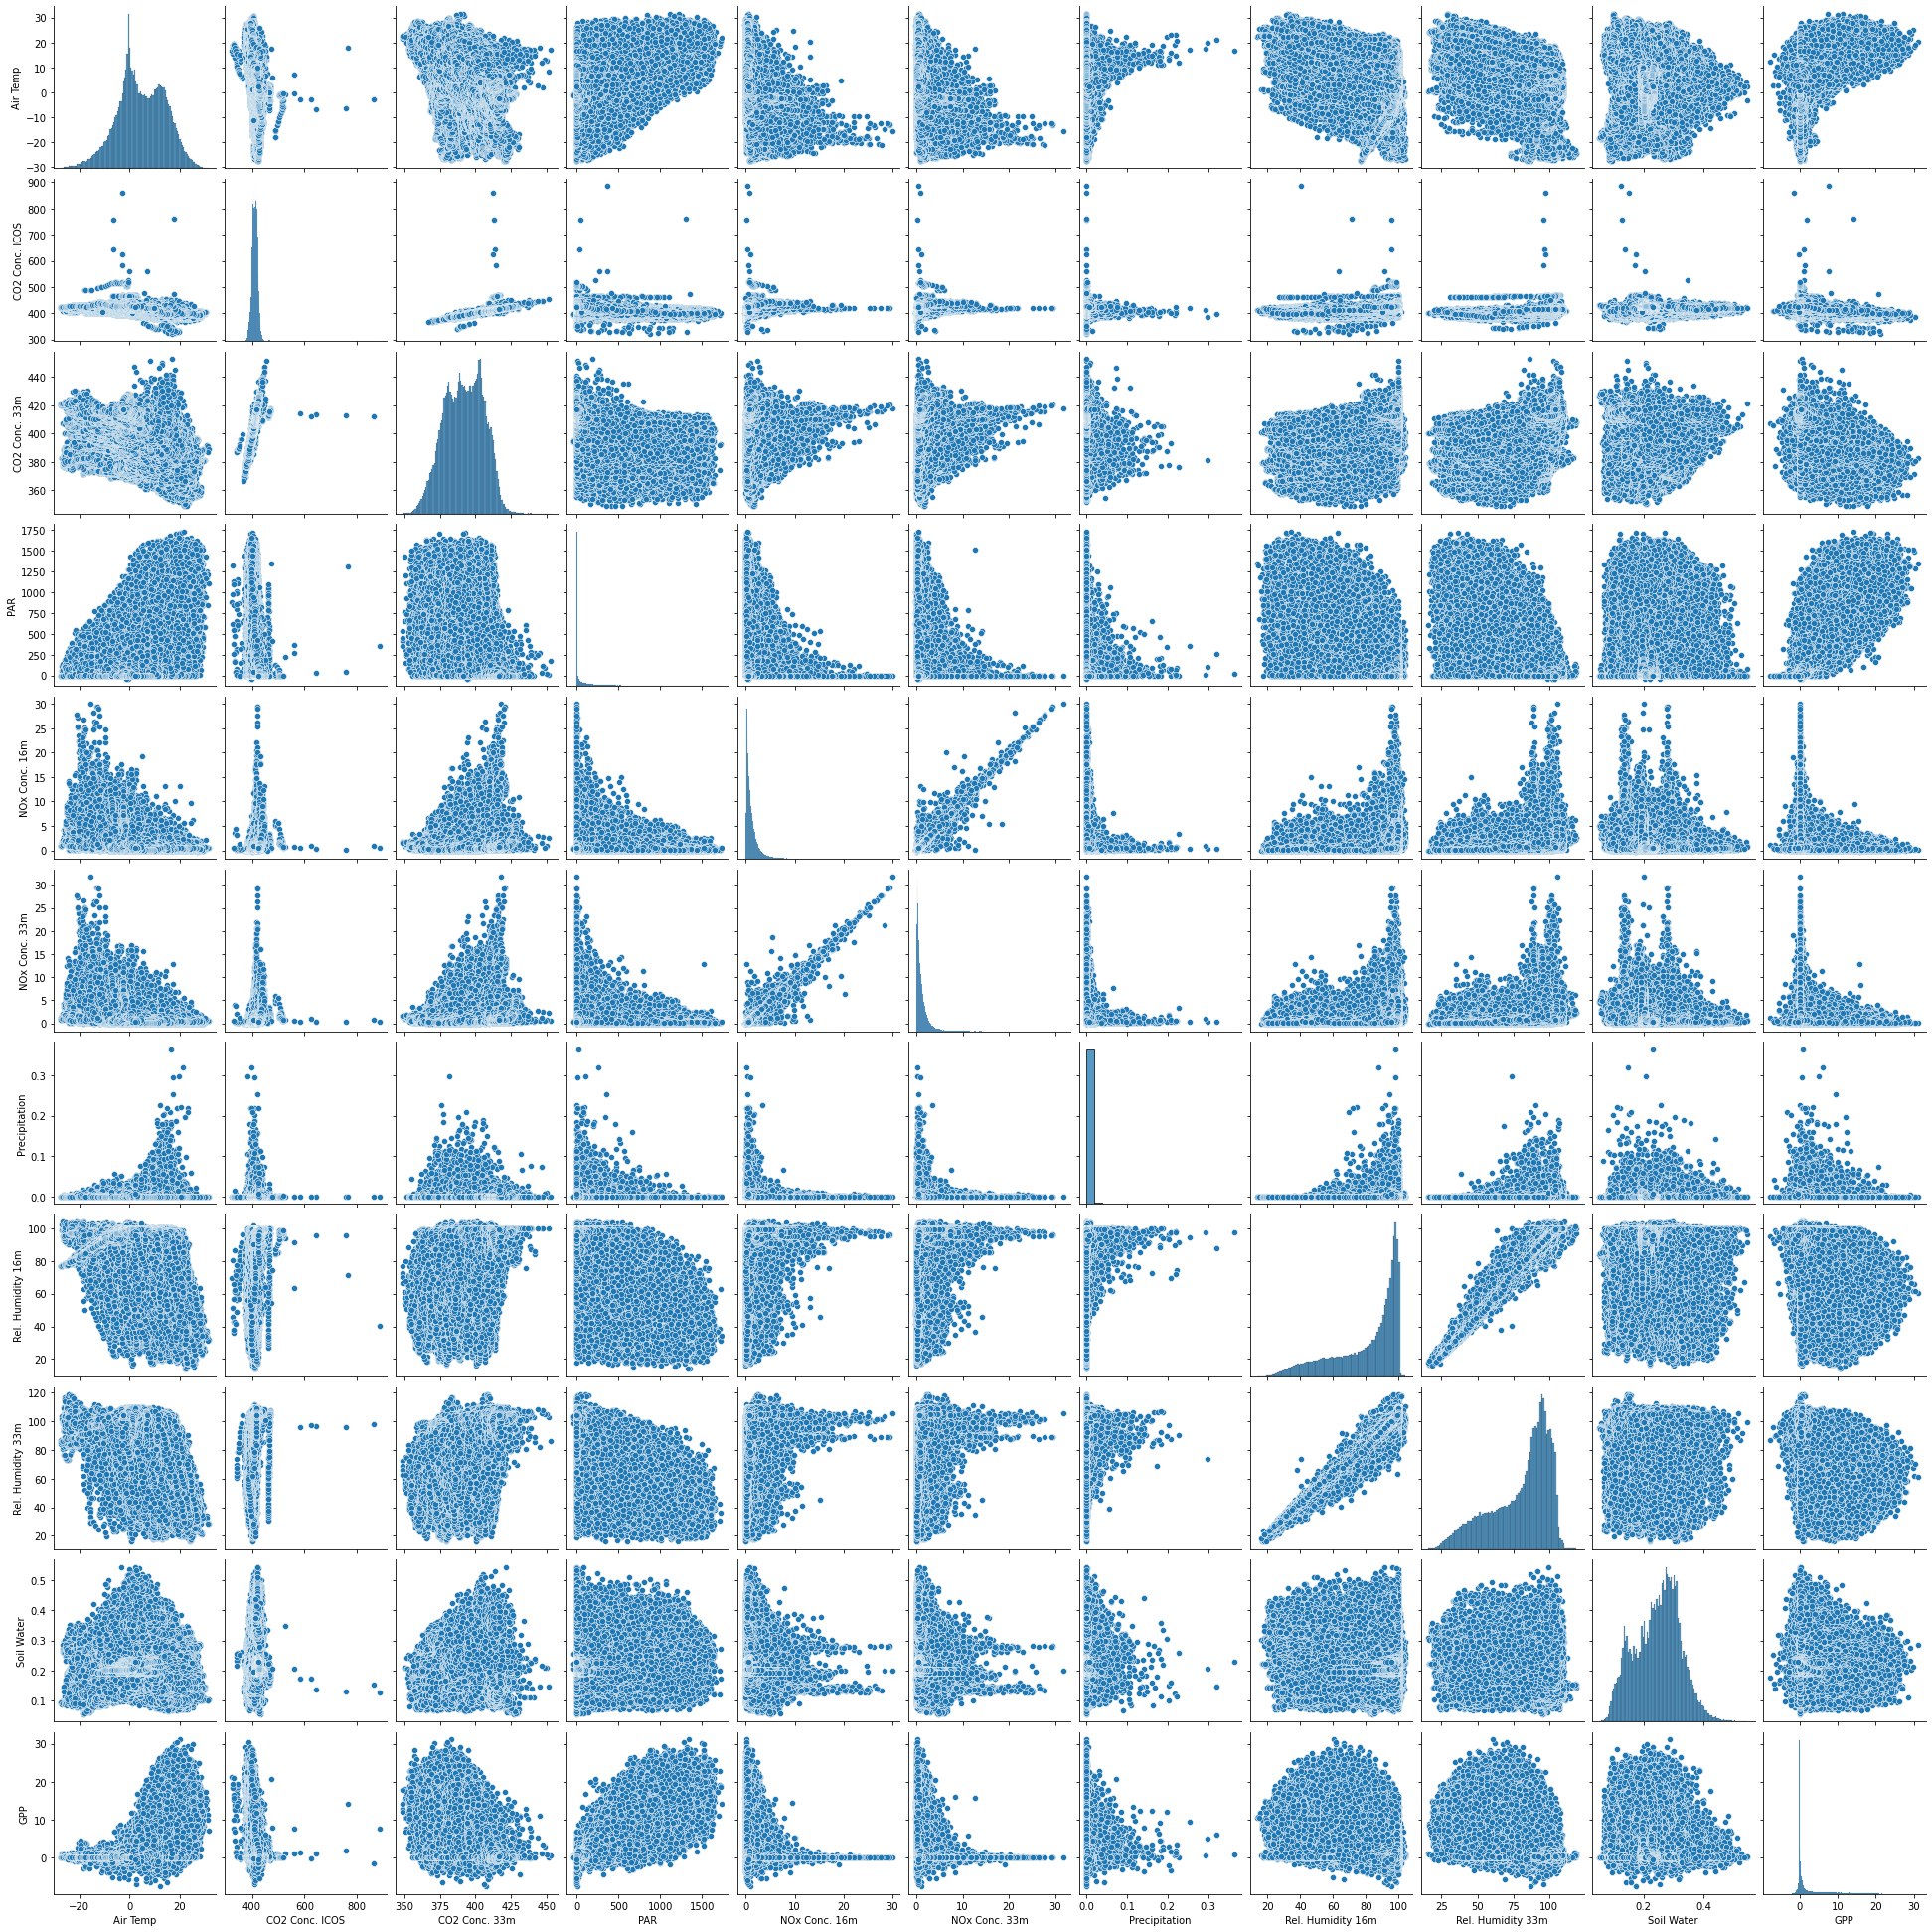

In [262]:
sns.pairplot(df)
plt.show()

Plot each feature as a seperate line plot. This allows us to visualise the entire 20 years of each feature seperately, and be able to directly compare them to other features. We can see that each feature tends to have its own seasonal variation, oscillating with a frequency of a year. 

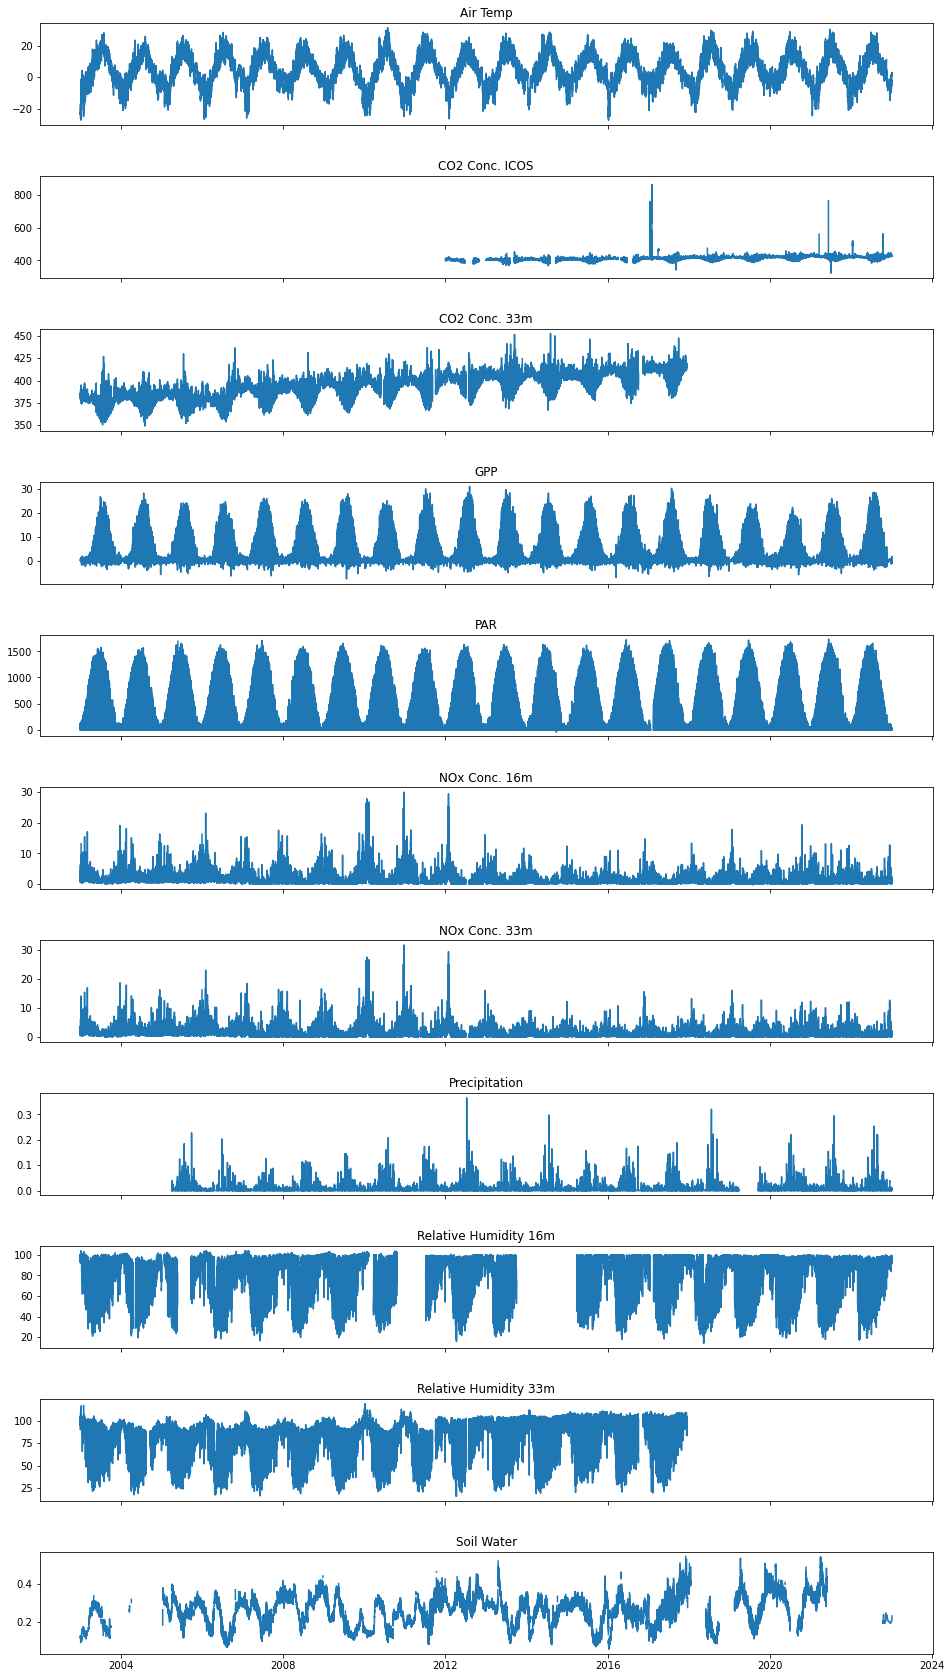

In [263]:
fig, axs = plt.subplots(nrows=11, ncols=1, figsize=(16,30), sharex=True)

axs[0].plot(df['Air Temp'])
axs[0].set_title('Air Temp')

axs[1].plot(df['CO2 Conc. ICOS'])
axs[1].set_title('CO2 Conc. ICOS')

axs[2].plot(df['CO2 Conc. 33m'])
axs[2].set_title('CO2 Conc. 33m')

axs[3].plot(df['GPP'])
axs[3].set_title('GPP')

axs[4].plot(df['PAR'])
axs[4].set_title('PAR')

axs[5].plot(df['NOx Conc. 16m'])
axs[5].set_title('NOx Conc. 16m')

axs[6].plot(df['NOx Conc. 33m'])
axs[6].set_title('NOx Conc. 33m')

axs[7].plot(df['Precipitation'])
axs[7].set_title('Precipitation')

axs[8].plot(df['Rel. Humidity 16m'])
axs[8].set_title('Relative Humidity 16m')

axs[9].plot(df['Rel. Humidity 33m'])
axs[9].set_title('Relative Humidity 33m')

axs[10].plot(df['Soil Water'])
axs[10].set_title('Soil Water')

plt.subplots_adjust(hspace=0.5)

plt.show()

We can take a closer look at these seasonal variations by plotting the last two years of the dataset

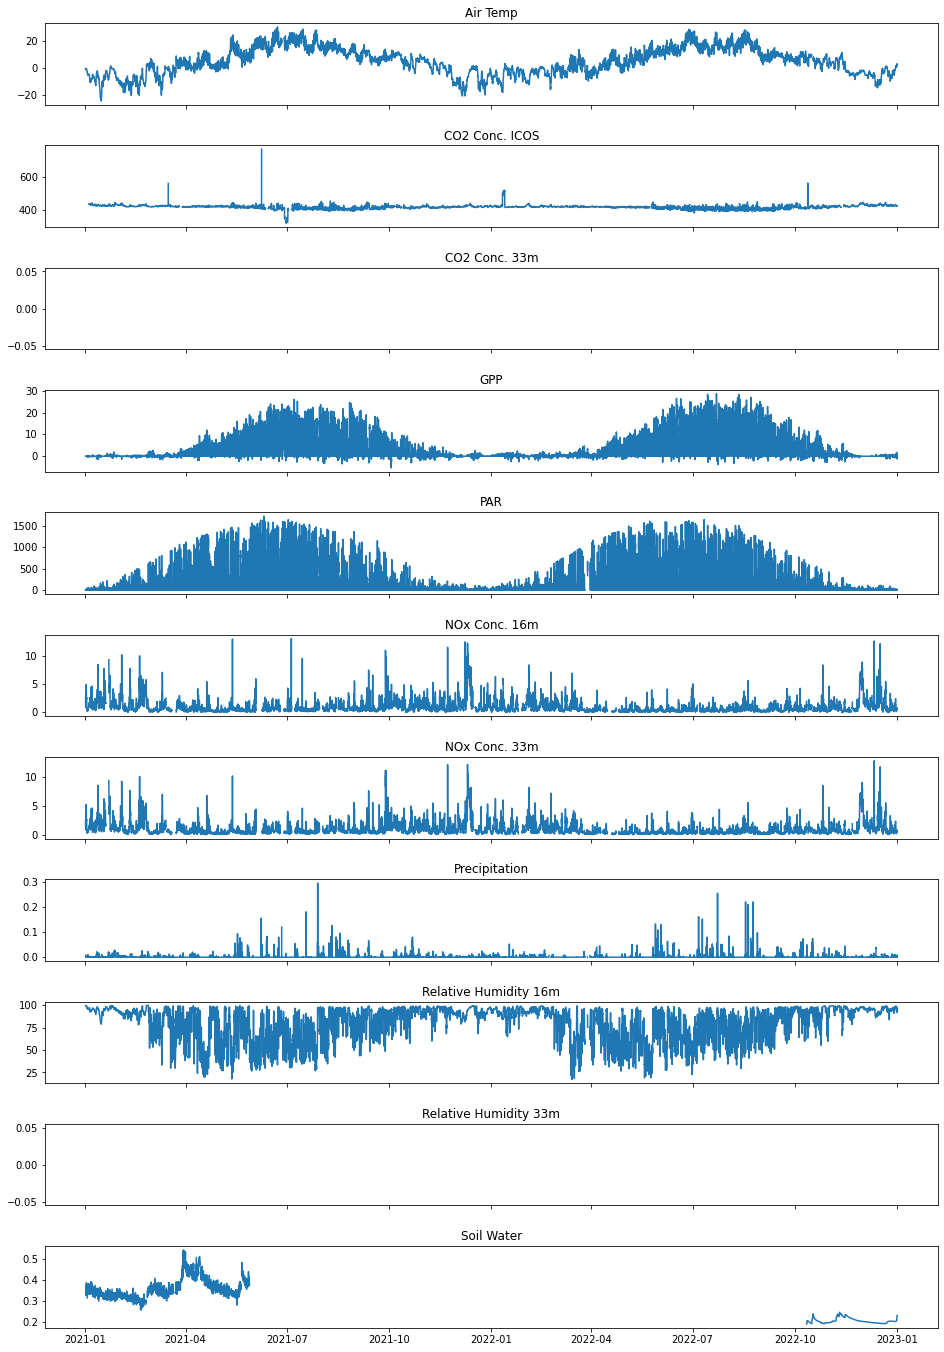

In [264]:
fig, axs = plt.subplots(nrows=11, ncols=1, figsize=(16,24), sharex=True)

axs[0].plot(df['Air Temp'].loc[(df.index > '01-01-2021')])
axs[0].set_title('Air Temp')

axs[1].plot(df['CO2 Conc. ICOS'].loc[(df.index > '01-01-2021')])
axs[1].set_title('CO2 Conc. ICOS')

axs[2].plot(df['CO2 Conc. 33m'].loc[(df.index > '01-01-2021')])
axs[2].set_title('CO2 Conc. 33m')

axs[3].plot(df['GPP'].loc[(df.index > '01-01-2021')])
axs[3].set_title('GPP')

axs[4].plot(df['PAR'].loc[(df.index > '01-01-2021')])
axs[4].set_title('PAR')

axs[5].plot(df['NOx Conc. 16m'].loc[(df.index > '01-01-2021')])
axs[5].set_title('NOx Conc. 16m')

axs[6].plot(df['NOx Conc. 33m'].loc[(df.index > '01-01-2021')])
axs[6].set_title('NOx Conc. 33m')

axs[7].plot(df['Precipitation'].loc[(df.index > '01-01-2021')])
axs[7].set_title('Precipitation')

axs[8].plot(df['Rel. Humidity 16m'].loc[(df.index > '01-01-2021')])
axs[8].set_title('Relative Humidity 16m')

axs[9].plot(df['Rel. Humidity 33m'].loc[(df.index > '01-01-2021')])
axs[9].set_title('Relative Humidity 33m')

axs[10].plot(df['Soil Water'].loc[(df.index > '01-01-2021')])
axs[10].set_title('Soil Water')

plt.subplots_adjust(hspace=0.5)

plt.show()

## Dealing with missing values

As we saw above, every feature apart from GPP has missing values. We will need to deal with those before we pass the data to our models. The way we deal with missing data depends on many factors, and we will reason about the best way to proceed with each of them below

### Air Temperature

Print out the total missing and percentage missing of air temperature

In [265]:
print(f'Total missing: {df["Air Temp"].isna().sum()}')
print(f'Percentage missing: {(df["Air Temp"].isna().sum()/len(df))*100}%')

Total missing: 2952
Percentage missing: 1.6837782340862424%


Plot Air Temperature. We can see there are no major gaps of missing data

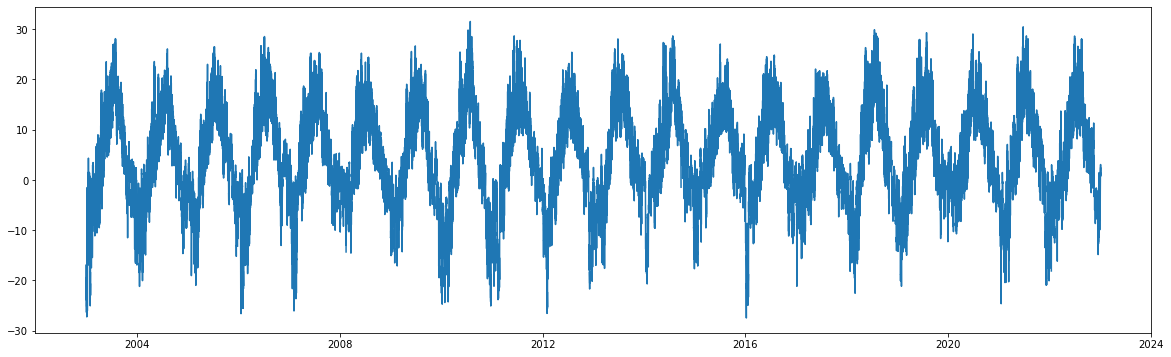

In [266]:
fig = plt.figure(figsize=(20, 6))
plt.plot(df['Air Temp'])

Due to there being a relatively small number of missing values, no large gaps of missing data, and the nature of temperature being closely related to its surrounding values, spline interpolation would work well in this instance. Spline works in a similar way to linear interpolation, except a polynomal of order n is fit through the data. This will be especially useful if a missing point is near the region of a local high or local low, where the rate of change of temperature is changing.

In [267]:
df['Air Temp'].interpolate(method='spline', order=3, inplace=True)

Verify all missing values have been filled

In [268]:
df['Air Temp'].isna().sum()

0

### CO2 Concentration

For CO2 Concentration we have 2 features - one official measurement at a height of 33m, and one non-official ICOS measurement at 16m. As we'd suspect, these are very highly correlated with a pearson coefficient of 0.87. This means a viable strategy to fill missing values is to use the values from one feature to fill the other.

In [269]:
df['CO2 Conc. 33m'].corr(df['CO2 Conc. ICOS'])

0.8680508439220153

In [270]:
print(f'Total missing 33m: {df["CO2 Conc. 33m"].isna().sum()}')
print(f'Percentage missing 33m: {(df["CO2 Conc. 33m"].isna().sum()/len(df))*100}% \n')
print(f'Total missing ICOS: {df["CO2 Conc. ICOS"].isna().sum()}')
print(f'Percentage missing ICOS: {(df["CO2 Conc. ICOS"].isna().sum()/len(df))*100}%')

Total missing 33m: 51752
Percentage missing 33m: 29.518594569929274% 

Total missing ICOS: 90837
Percentage missing ICOS: 51.81211498973306%


Plot the two CO2 concentration features

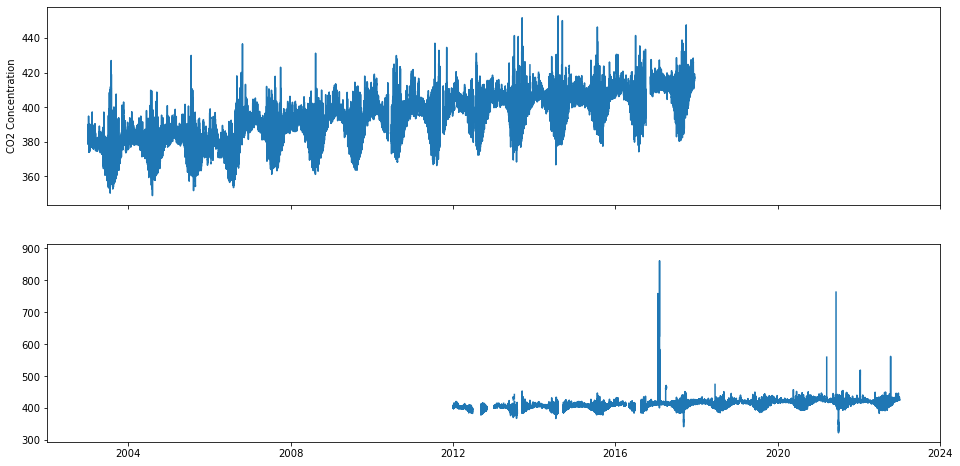

In [271]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(16,8), sharex=True)

axs[0].plot(df['CO2 Conc. 33m'])
axs[0].set_ylabel('CO2 Concentration')
axs[1].plot(df['CO2 Conc. ICOS'])

In [272]:
df['CO2 Concentration'] = df['CO2 Conc. 33m'].fillna(df['CO2 Conc. ICOS'])

In [273]:
df['CO2 Concentration'].isna().sum()

7492

We now have a mostly complete time series for the CO2 concentration, but there is still some missing values. We also have some clear outliers coming from the ICOS dataset which we will need to deal with so they do not throw off the model

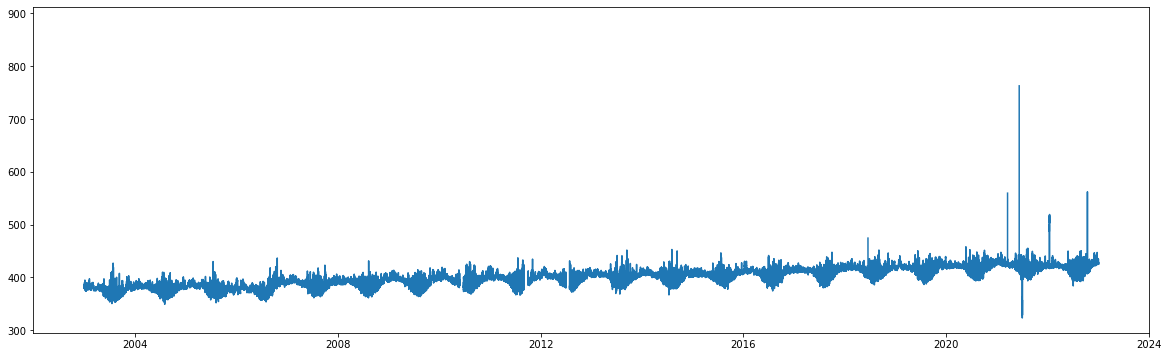

In [274]:
fig = plt.figure(figsize=(20, 6))
plt.plot(df['CO2 Concentration'])

Calculate the Z-score for each sample. This gives a measurement of how far a given point is away from the mean of the set. We can then choose to exclude any values over a certain threshold, removing these as outliers

In [275]:
zscore = (df['CO2 Concentration'] - df['CO2 Concentration'].mean()) / df['CO2 Concentration'].std(ddof=0)
outliers = df[(zscore > 3) | (zscore < -3)]
len(outliers)

95

Drop the outliers from the dataset

In [276]:
df.drop(outliers.index, inplace=True)

Plot the CO2 concentration again. We can see the extreme values have been removed

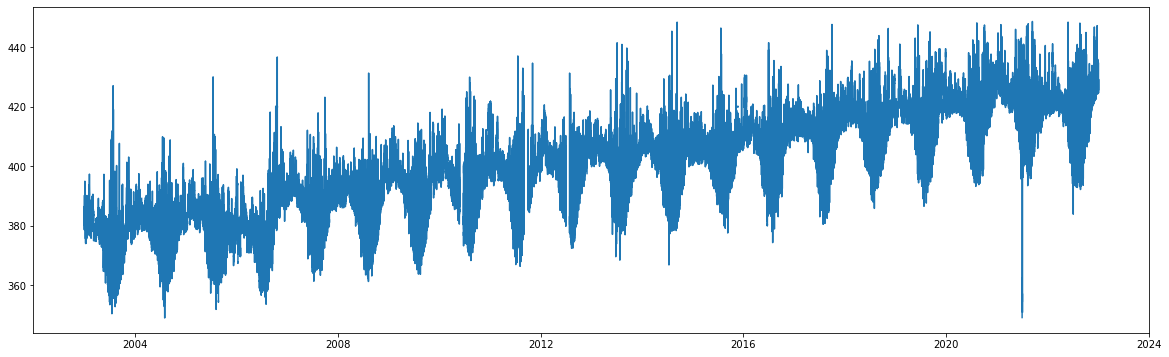

In [277]:
fig = plt.figure(figsize=(20, 6))
plt.plot(df['CO2 Concentration'])

In [278]:
df['CO2 Concentration'].isna().sum()

7492

We no longer need to orignal 2 features for CO2 concentration as we have created a new one as a result of these 2, so they can be dropped from the dataframe

In [279]:
df.drop(['CO2 Conc. 33m', 'CO2 Conc. ICOS'], axis=1, inplace=True)

Drop any remainiing missing values from the dataframe. Due to the strong correlation between CO2 concentraion and GPP, we need to be careful about imputing values where we cannot be confident of their accuracy. In this instance we should just remove these.

In [280]:
df.dropna(subset=['CO2 Concentration'], inplace=True)

In [281]:
df['CO2 Concentration'].isna().sum()

0

### PAR

Print the total and percentage missing values for PAR

In [282]:
print(f'Total missing: {df["PAR"].isna().sum()}')
print(f'Percentage missing: {(df["PAR"].isna().sum()/len(df))*100}%')

Total missing: 993
Percentage missing: 0.5920123052708769%


Plot the PAR data

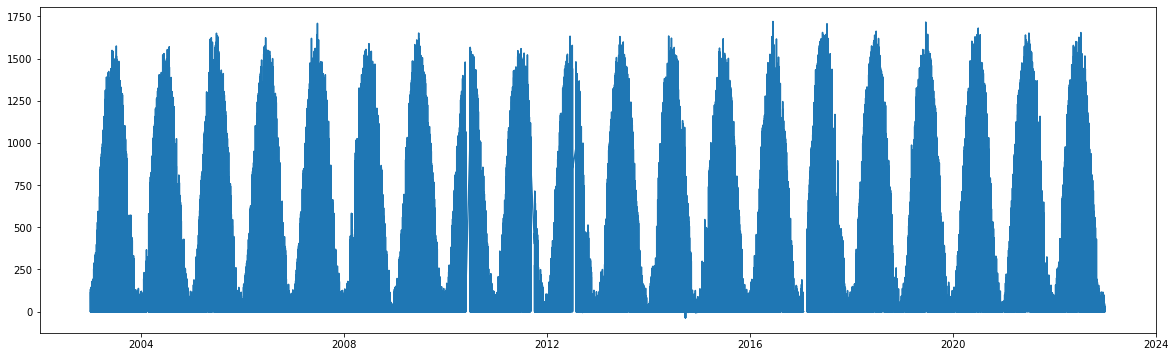

In [283]:
fig = plt.figure(figsize=(20, 6))
plt.plot(df['PAR'])

Small number of missing values for this feature too, however when we zoom in on this feature, we can see the PAR fluctuates on a daily basis, and we are missing several days worth of concurrent data. Due to the very high correlation between PAR and GPP, we need to be extremely careful about imputing potentially innaccurate data, as this will have a greater effect on model performance. In this instance, I propose it is better to simply remove the samples where PAR is missing. This does reduce our total dataset by over 1000, but will ensure the resulting model is as accurate as possible

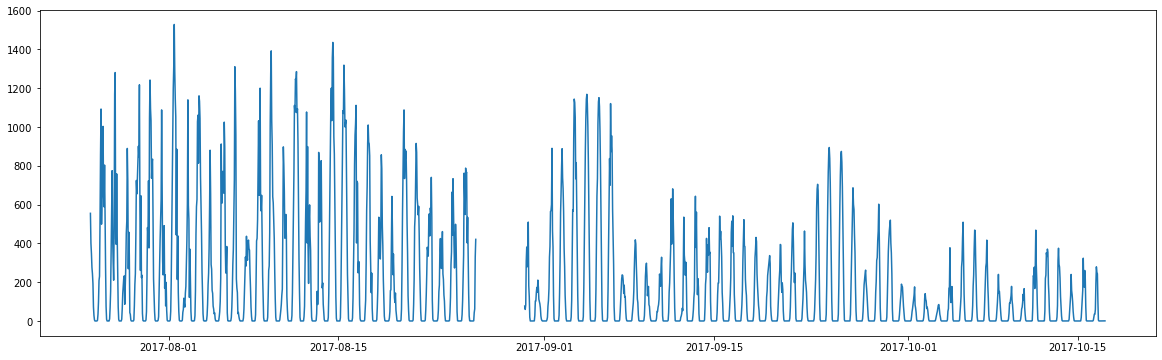

In [284]:
fig = plt.figure(figsize=(20, 6))
plt.plot(df['PAR'][123000:125000])

In [285]:
df.dropna(subset=['PAR'], inplace=True)

Verify no missing values remain for PAR

In [286]:
df['PAR'].isna().sum()

0

### NOx Concentration

NOx is another feature where we have measurements from 2 sensors. However, when we take a closer look we can see that of the 5761 missing values for NOx at 33m, 5760 of them are also missing in the 16m set, so we cannot simply use one time series to impute into the other, so we'll need another method

In [287]:
print(f'Total missing: {df["NOx Conc. 16m"].isna().sum()}')
print(f'Percentage missing: {(df["NOx Conc. 16m"].isna().sum()/len(df))*100}%\n')
print(f'Total missing: {df["NOx Conc. 33m"].isna().sum()}')
print(f'Percentage missing: {(df["NOx Conc. 33m"].isna().sum()/len(df))*100}%\n')

nan_count = df[df[['NOx Conc. 16m', 'NOx Conc. 33m']].isna().all(axis=1)].shape[0]

print(f"Number of NaN values in both columns: {nan_count}")

Total missing: 6435
Percentage missing: 3.859301907160849%

Total missing: 5761
Percentage missing: 3.4550797649034424%

Number of NaN values in both columns: 5760


We can see there are no large gaps on missing data. The NOx concentration also lacks any real predictable structure, so we'll just stick to linear interpolation for this one

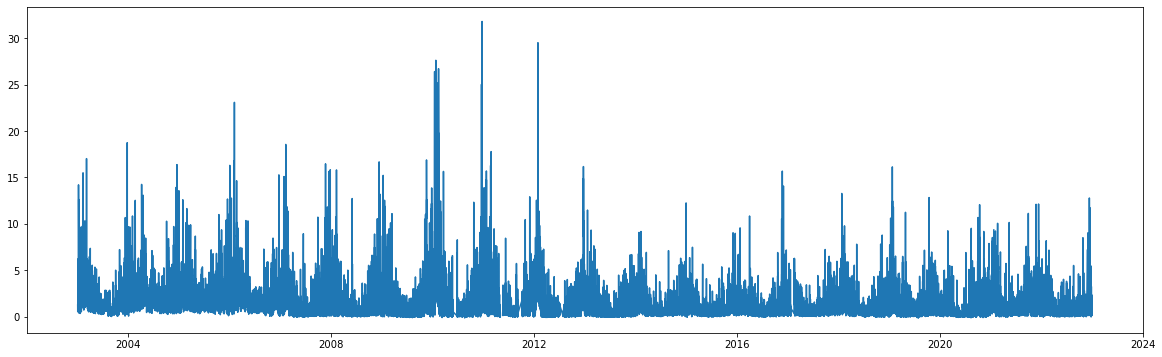

In [288]:
fig = plt.figure(figsize=(20, 6))
plt.plot(df['NOx Conc. 33m'])

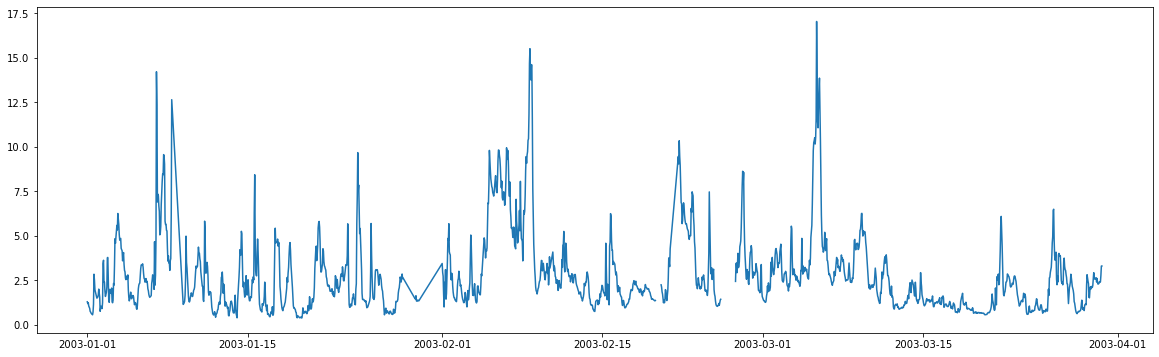

In [289]:
fig = plt.figure(figsize=(20, 6))
plt.plot(df['NOx Conc. 33m'][:2000])

In [290]:
df['NOx Conc. 33m'].interpolate(method='linear', inplace=True)

In [291]:
df['NOx Conc. 33m'].isna().sum()

0

We no longer need the NOx values at 16m, so we can drop these from the dataframe

In [292]:
df.drop(['NOx Conc. 16m'], axis=1, inplace=True)

### Humidity

For humidity, we have 2 features - humidity at 16m and humidity at 33m. Because these are very high correlated as shown below (coefficient around 0.97), we can use one of the features to fill the missing values in the other. We can then drop the redundant feature as the values of one are strongly encoded in the other.

In [293]:
df['Rel. Humidity 16m'].corr(df['Rel. Humidity 33m'])

0.9680750718047374

Because the humidity for 16m has a smaller number of missing values, we will use this as our feature to keep, and use the humidity at 33m to fill the missing values. We can also see from the graphs below that the missing values for each time series occur at different points, so we should expect most missing values to be filled this way

In [294]:
print(f'Total missing 16m: {df["Rel. Humidity 16m"].isna().sum()}')
print(f'Percentage missing 16m: {(df["Rel. Humidity 16m"].isna().sum()/len(df))*100}% \n')
print(f'Total missing 33m: {df["Rel. Humidity 33m"].isna().sum()}')
print(f'Percentage missing 33m: {(df["Rel. Humidity 33m"].isna().sum()/len(df))*100}%')

Total missing 16m: 27841
Percentage missing 16m: 16.697253208588222% 

Total missing 33m: 44974
Percentage missing 33m: 26.97253208588221%


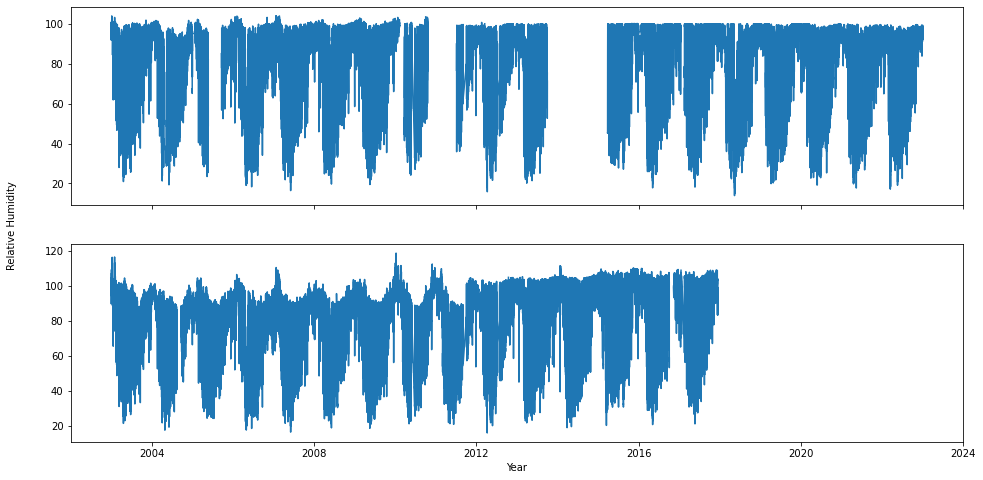

In [306]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(16,8), sharex=True)

axs[0].plot(df['Rel. Humidity 16m'])
fig.text(0.07, 0.5, 'Relative Humidity', va='center', rotation='vertical')
axs[1].plot(df['Rel. Humidity 33m'])
axs[1].set_xlabel('Year')
plt.show()

In [307]:
df['Rel. Humidity'] = df['Rel. Humidity 16m'].fillna(df['Rel. Humidity 33m'])

We have decreased the number of missing values from 27841 but still have 1415 left to fill. These would've been where there was a missing value in both features at the same time point. For this was can use a standard imputing technique to fill the rest. Due to having small gaps in missing values, here we can just use a standard linear interpolation

In [308]:
df['Rel. Humidity'].isna().sum()

1415

In [309]:
df['Rel. Humidity'].interpolate(method='linear', inplace=True)

In [310]:
df['Rel. Humidity'].isna().sum()

0

Text(0, 0.5, 'Relative Humidity')

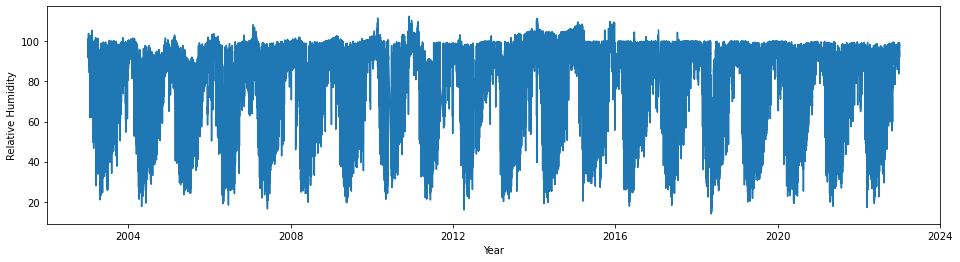

In [311]:
fig = plt.figure(figsize=(16, 4))
plt.plot(df['Rel. Humidity'])
plt.xlabel('Year')
plt.ylabel('Relative Humidity')

Now that we have the new feature of combined relative humidity at 16 and 33m, we can remove these features from the dataframe

In [312]:
df.drop(['Rel. Humidity 16m', 'Rel. Humidity 33m'], axis=1, inplace=True)

### Precipitation

Print the total and percentage missing values for precipitation

In [313]:
print(f'Total missing: {df["Precipitation"].isna().sum()}')
print(f'Percentage missing: {(df["Precipitation"].isna().sum()/len(df))*100}% \n')

Total missing: 23200
Percentage missing: 13.913877893726761% 



For precipitation, we are missing the entire first 2 years of data. There isn't any suitable methods for filling this missing data with reliable values, so we'll drop this feature entirely

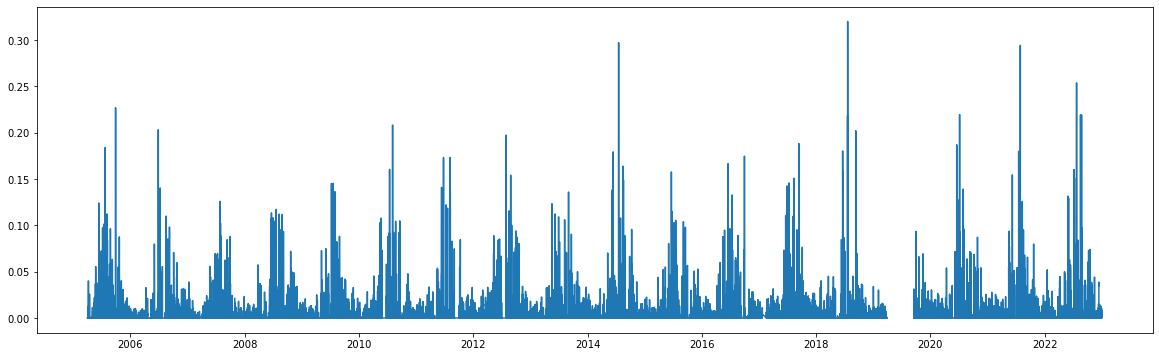

In [314]:
fig = plt.figure(figsize=(20, 6))
plt.plot(df['Precipitation'])

In [315]:
df.drop(['Precipitation'], axis=1, inplace=True)

### Soil water

Print the total and percentage missing for soil moisture

In [316]:
print(f'Total missing: {df["Soil Water"].isna().sum()}')
print(f'Percentage missing: {(df["Soil Water"].isna().sum()/len(df))*100}% \n')

Total missing: 62136
Percentage missing: 37.26520331054336% 



Due to the large amount of missing data and the low correlation with GPP, it is best to simple drop this feature too

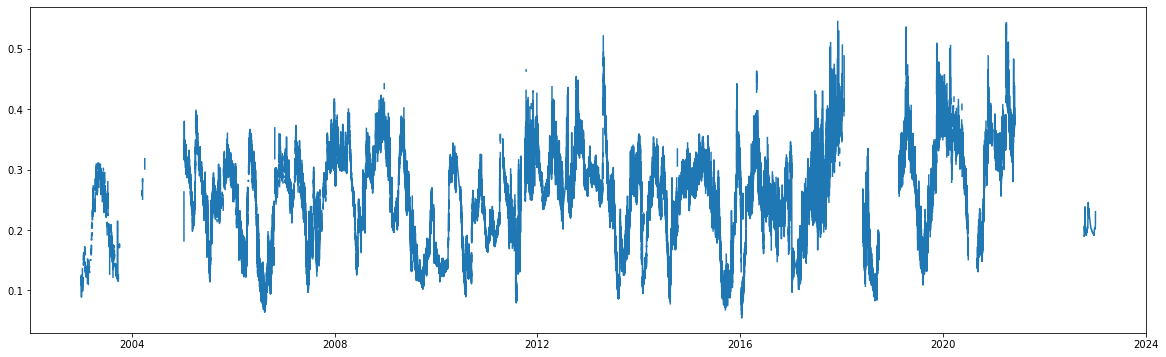

In [317]:
fig = plt.figure(figsize=(20, 6))
plt.plot(df['Soil Water'])

In [318]:
df.drop(['Soil Water'], axis=1, inplace=True)

Verify no missing values are left in any of our remaining features

In [319]:
df.isna().sum()

Air Temp             0
PAR                  0
NOx Conc. 33m        0
GPP                  0
CO2 Concentration    0
Rel. Humidity        0
dtype: int64

Write the cleaned dataset out to another csv. We can then import this and use it to train the models with

In [320]:
df.to_csv('./data/Cleaned Data/cleanedData.csv', index=True)

## Further analysis and feature adding

Below we do a little more exploring and visualizing of the dataset. We also add some new features based on the date, which gives some interesting new ways to visualize the data

In [321]:
df['hour'] = df.index.hour
df['dayofweek'] = df.index.dayofweek
df['quarter'] = df.index.quarter
df['month'] = df.index.month
df['year'] = df.index.year
df['dayofyear'] = df.index.dayofyear

Plot a boxplot of GPP by month

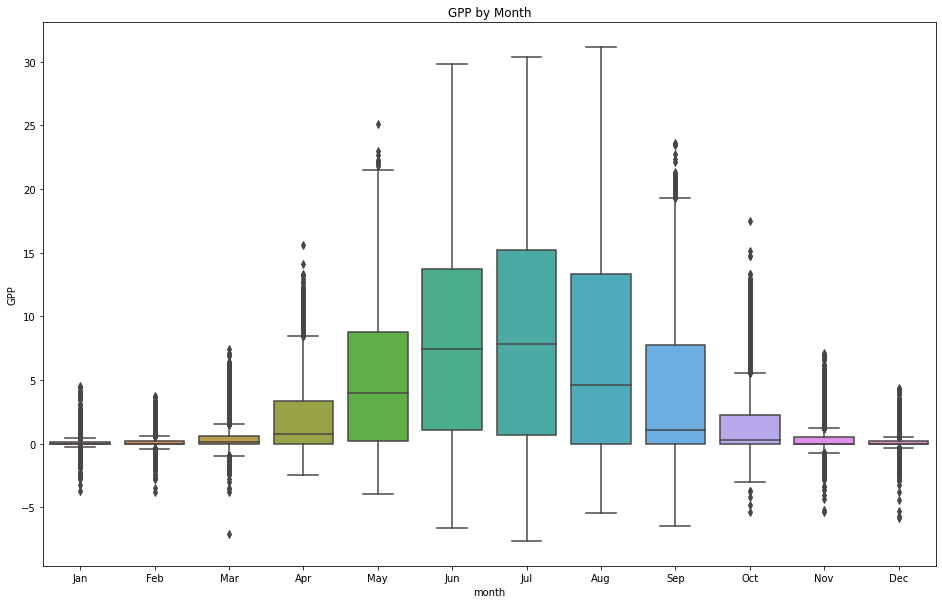

In [323]:
fig = plt.figure(figsize=(16,10))

plt.title('GPP by Month')
sns.boxplot(data=df, x='month', y='GPP')
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10,11], labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

Plot a boxplot of GPP by hour of the day

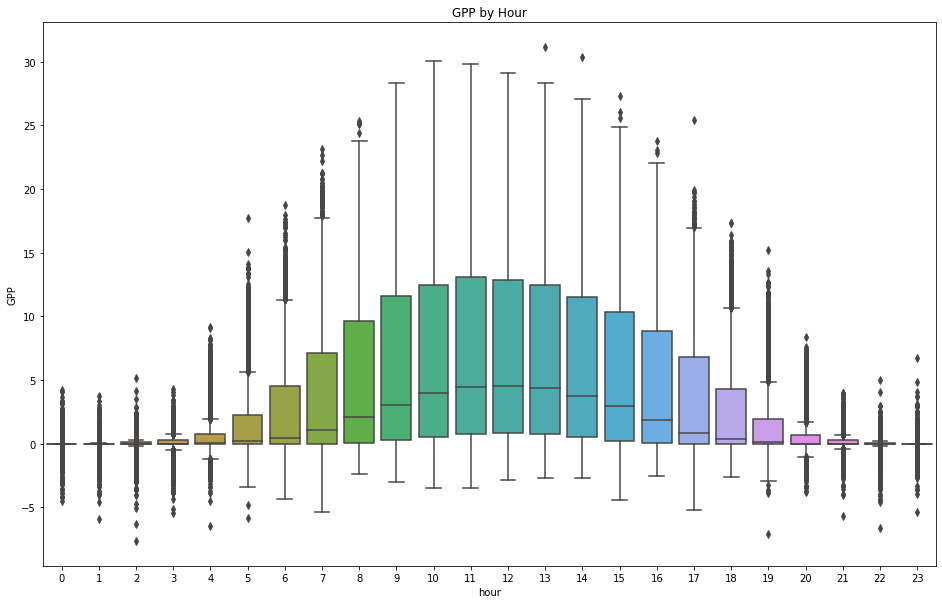

In [324]:
fig = plt.figure(figsize=(16,10))

plt.title('GPP by Hour')
sns.boxplot(data=df, x='hour', y='GPP')
plt.show()

This one doesn't really add anything of value, but gives us a more granular view of GPP over the course of the year

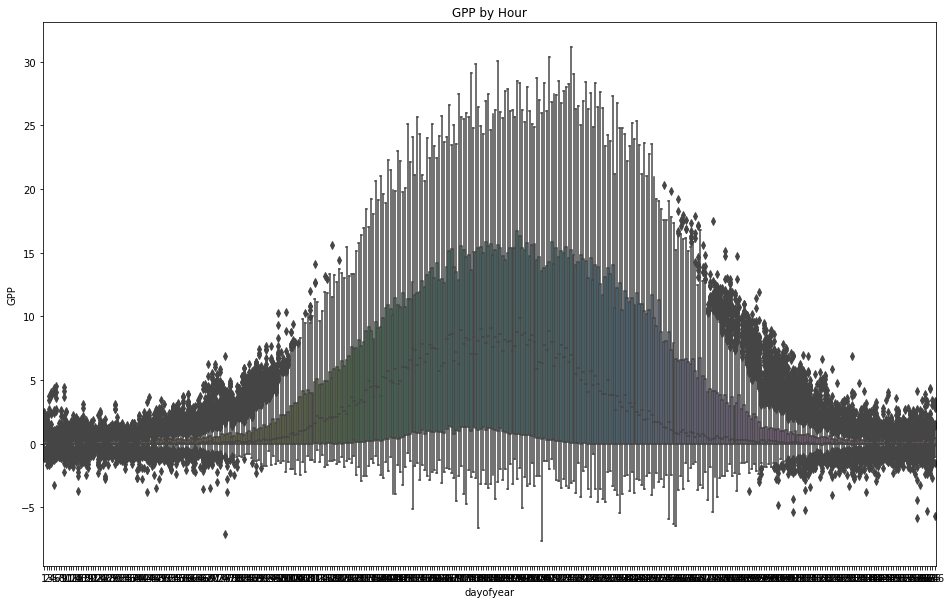

In [325]:
fig = plt.figure(figsize=(16,10))

plt.title('GPP by Hour')
sns.boxplot(data=df, x='dayofyear', y='GPP')
plt.show()

In [326]:
from datetime import date

Create a new dataframe where we add the Timestamp back as a regular column. This is import as below we plot a regression plot which does not work well with datetime index's

In [327]:
df_ts = df.reset_index()

In [328]:
df_ts

Timestamp  Air Temp      PAR  NOx Conc. 33m     GPP  \
0      2003-01-01 00:00:00 -23.21850  0.11767          1.275  0.0000   
1      2003-01-01 01:00:00 -23.33533  0.11767          1.176  0.0000   
2      2003-01-01 02:00:00 -23.45733  0.04983          1.222  0.0000   
3      2003-01-01 03:00:00 -23.63433  0.05017          1.042  0.0000   
4      2003-01-01 04:00:00 -23.62583  0.14525          0.967  0.0000   
...                    ...       ...      ...            ...     ...   
166735 2022-12-31 19:00:00   2.86950 -0.07844          0.590 -0.5565   
166736 2022-12-31 20:00:00   3.07617 -0.07800          0.673 -0.3340   
166737 2022-12-31 21:00:00   3.04817 -0.07831          0.497 -0.8510   
166738 2022-12-31 22:00:00   2.87550 -0.07829          0.397 -1.2670   
166739 2022-12-31 23:00:00   2.36367 -0.07800          0.417 -0.4355   

        CO2 Concentration  Rel. Humidity  hour  dayofweek  quarter  month  \
0               381.52500       99.41383     0          2        1      1   
1               381.40700       99.40667     1          2        1      1   
2               381.37100      100.56050     2          2        1      1   
3               381.28500      100.19917     3          2        1      1   
4               381.29200       98.42567     4          2        1      1   
...                   ...            ...   ...        ...      ...    ...   
166735          426.88695       94.96453    19          5        4     12   
166736          426.54005       93.20956    20          5        4     12   
166737          426.19875       92.03742    21          5        4     12   
166738          425.98060       93.15154    22          5        4     12   
166739          425.70215       95.38303    23          5        4     12   

        year  dayofyear  
0       2003          1  
1       2003          1  
2       2003          1  
3       2003          1  
4       2003          1  
...      ...        ...  
166735  2022        365  
166736  2022        365  
166737  2022        365  
166738  2022        365  
166739  2022        365  

[166740 rows x 13 columns]

Create another feature which converts the date to a single integer

In [329]:
df_ts['date_ordinal'] = pd.to_datetime(df_ts['Timestamp']).apply(lambda date: date.toordinal())

Plot the history of CO2 concentration with a regression line through the data. We also convert the ordinal date back into a regular date for the xtick labels

<ipython-input-330-fef5bd23639b>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels)


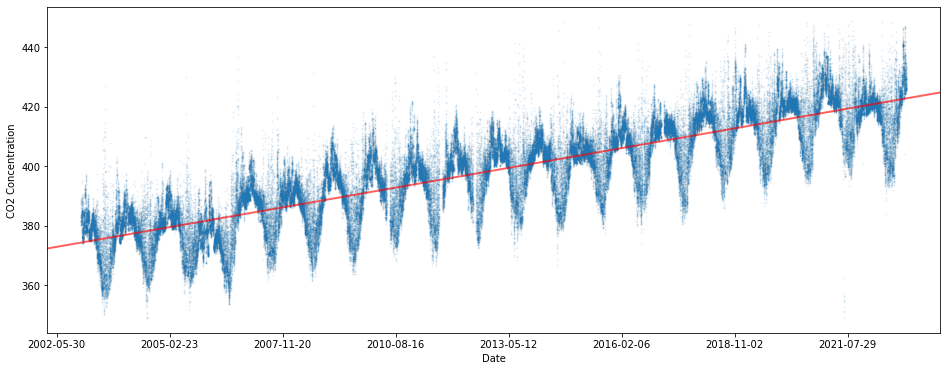

In [330]:
fig = plt.figure(figsize=(16,6))
ax = sns.regplot(data=df_ts, x='date_ordinal', y='CO2 Concentration', truncate=False, scatter_kws={'s': 0.5, 'alpha': 0.1}, line_kws={'color': 'red','linewidth': 2, 'alpha': 0.6})
ax.set_xlim(df_ts['date_ordinal'].min() - 300, df_ts['date_ordinal'].max() + 300)
ax.set_xlabel('Date')
new_labels = [date.fromordinal(int(item)) for item in ax.get_xticks()]
ax.set_xticklabels(new_labels)
plt.show()

Plot GPP values from 2003-2005 to show the seasonal trends

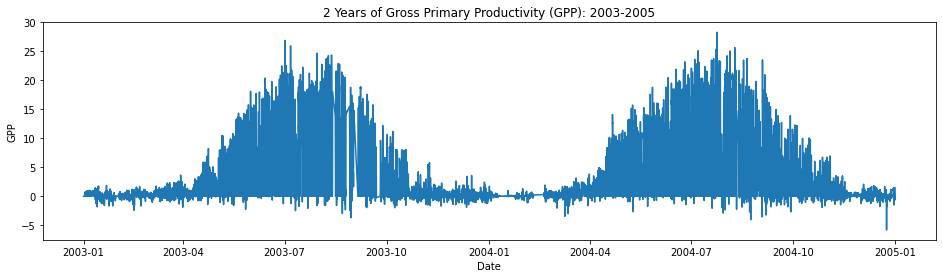

In [340]:
fig = plt.figure(figsize=(16,4))
plt.plot(df[(df.index.year >= 2003) & (df.index.year < 2005)]['GPP'])
plt.title('2 Years of Gross Primary Productivity (GPP): 2003-2005')
plt.xlabel('Date')
plt.ylabel('GPP')
plt.show()

Plot GPP values for the first week of July to show daily trends

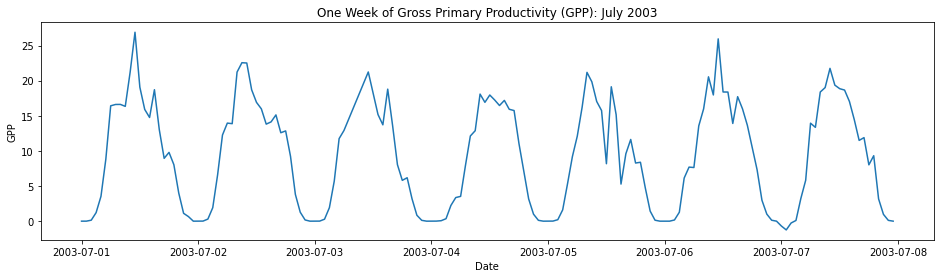

In [343]:
fig = plt.figure(figsize=(16,4))
plt.plot(df[(df.index >= '07-01-2003') & (df.index < '07-08-2003')]['GPP'])
plt.title('One Week of Gross Primary Productivity (GPP): July 2003')
plt.xlabel('Date')
plt.ylabel('GPP')
plt.show()